In [1]:

import kagglehub

# Download latest version
path = kagglehub.dataset_download("jeleeladekunlefijabi/ship-performance-clustering-dataset")

print("Path to dataset files:", path)

/home/codespace/.python/current/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: /home/codespace/.cache/kagglehub/datasets/jeleeladekunlefijabi/ship-performance-clustering-dataset/versions/1


In [2]:
import pandas as pd
df = pd.read_csv(f"{path}/Ship_Performance_Dataset.csv")

In [3]:
df.sample(6)

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
2253,2023-12-31,Bulk Carrier,Transoceanic,Steam Turbine,Critical,19.668238,2987.318609,1867.836374,6.854367,Rough,801.919425,495407.131433,211495.801459,41.570905,1.476782,0.760250,4,81.825492
1640,2024-04-07,Bulk Carrier,Coastal,NaN,Critical,20.176282,1410.387010,854.473289,5.688935,Moderate,308.209595,429645.501996,890137.336717,51.791417,0.757668,0.581899,4,61.322101
1233,2024-02-11,Tanker,Long-haul,Diesel,Fair,18.049912,1025.596119,688.413745,10.295403,Moderate,1675.907630,308772.755862,516390.980622,13.596244,0.633956,0.699877,3,81.909154
1739,2023-12-24,Container Ship,Short-haul,Steam Turbine,Good,18.685242,1021.029133,142.155774,12.596526,Moderate,1825.763754,215803.168517,840944.470306,56.979113,0.453740,1.401388,5,74.212311
1121,2024-02-25,Tanker,Coastal,Heavy Fuel Oil (HFO),Critical,22.747879,896.965077,625.630230,7.787964,Calm,1343.454523,486267.784627,712959.461135,47.095645,0.899110,1.486870,2,54.317316
134,2023-10-22,NaN,Long-haul,Diesel,NaN,14.645640,2605.764755,1714.868005,11.434511,Moderate,682.699077,439967.189221,51708.408428,55.279753,0.533056,1.313426,3,58.937420


In [4]:
df.describe(include='object')

,Date,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Weather_Condition
count,2736,2600,2600,2600,2600,2600
unique,57,4,4,3,3,3
top,2023-06-04,Bulk Carrier,Long-haul,Diesel,Good,Calm
freq,48,669,686,892,873,893


In [5]:
print(f"{df.Weather_Condition.unique()=}")
print(f"{df.Maintenance_Status.unique()=}")
print(f"{df.Ship_Type.unique()=}")

df.Weather_Condition.unique()=array(['Moderate', 'Rough', 'Calm', nan], dtype=object)
df.Maintenance_Status.unique()=array(['Critical', 'Good', 'Fair', nan], dtype=object)
df.Ship_Type.unique()=array(['Container Ship', 'Fish Carrier', 'Bulk Carrier', nan, 'Tanker'],
      dtype=object)


In [6]:
df.describe(exclude="object")

,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
count,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000,2736.000000
mean,17.602863,1757.610939,1036.406203,9.929103,1032.573264,255143.344488,521362.062011,41.747536,0.798656,1.003816,4.914839,75.219222
std,4.311979,717.002777,568.632080,2.876423,558.697499,140890.482189,271211.625499,17.633130,0.403590,0.288251,2.597647,14.510168
min,10.009756,501.025220,50.433150,5.001947,50.229624,10092.306318,50351.814447,12.019909,0.100211,0.500004,1.000000,50.012005
25%,13.928452,1148.104914,548.511573,7.437485,553.983629,131293.378767,290346.388017,26.173537,0.463592,0.758033,3.000000,62.703724
50%,17.713757,1757.494344,1037.816060,9.918965,1043.207497,257157.653226,520176.931762,41.585188,0.789877,1.009009,5.000000,75.504709
75%,21.284785,2382.594292,1540.934161,12.413149,1527.722391,381796.930499,750072.791216,57.363922,1.147426,1.252808,7.000000,87.721205
max,24.997043,2998.734329,1998.337057,14.992947,1999.126697,499734.867868,999916.696140,71.972415,1.499259,1.499224,9.000000,99.999643


In [7]:
print(df.select_dtypes(include='object').isnull().sum())

Date                    0
Ship_Type             136
Route_Type            136
Engine_Type           136
Maintenance_Status    136
Weather_Condition     136
dtype: int64


In [8]:
print(df.select_dtypes(exclude='object').isnull().sum())

Speed_Over_Ground_knots    0
Engine_Power_kW            0
Distance_Traveled_nm       0
Draft_meters               0
Cargo_Weight_tons          0
Operational_Cost_USD       0
Revenue_per_Voyage_USD     0
Turnaround_Time_hours      0
Efficiency_nm_per_kWh      0
Seasonal_Impact_Score      0
Weekly_Voyage_Count        0
Average_Load_Percentage    0
dtype: int64


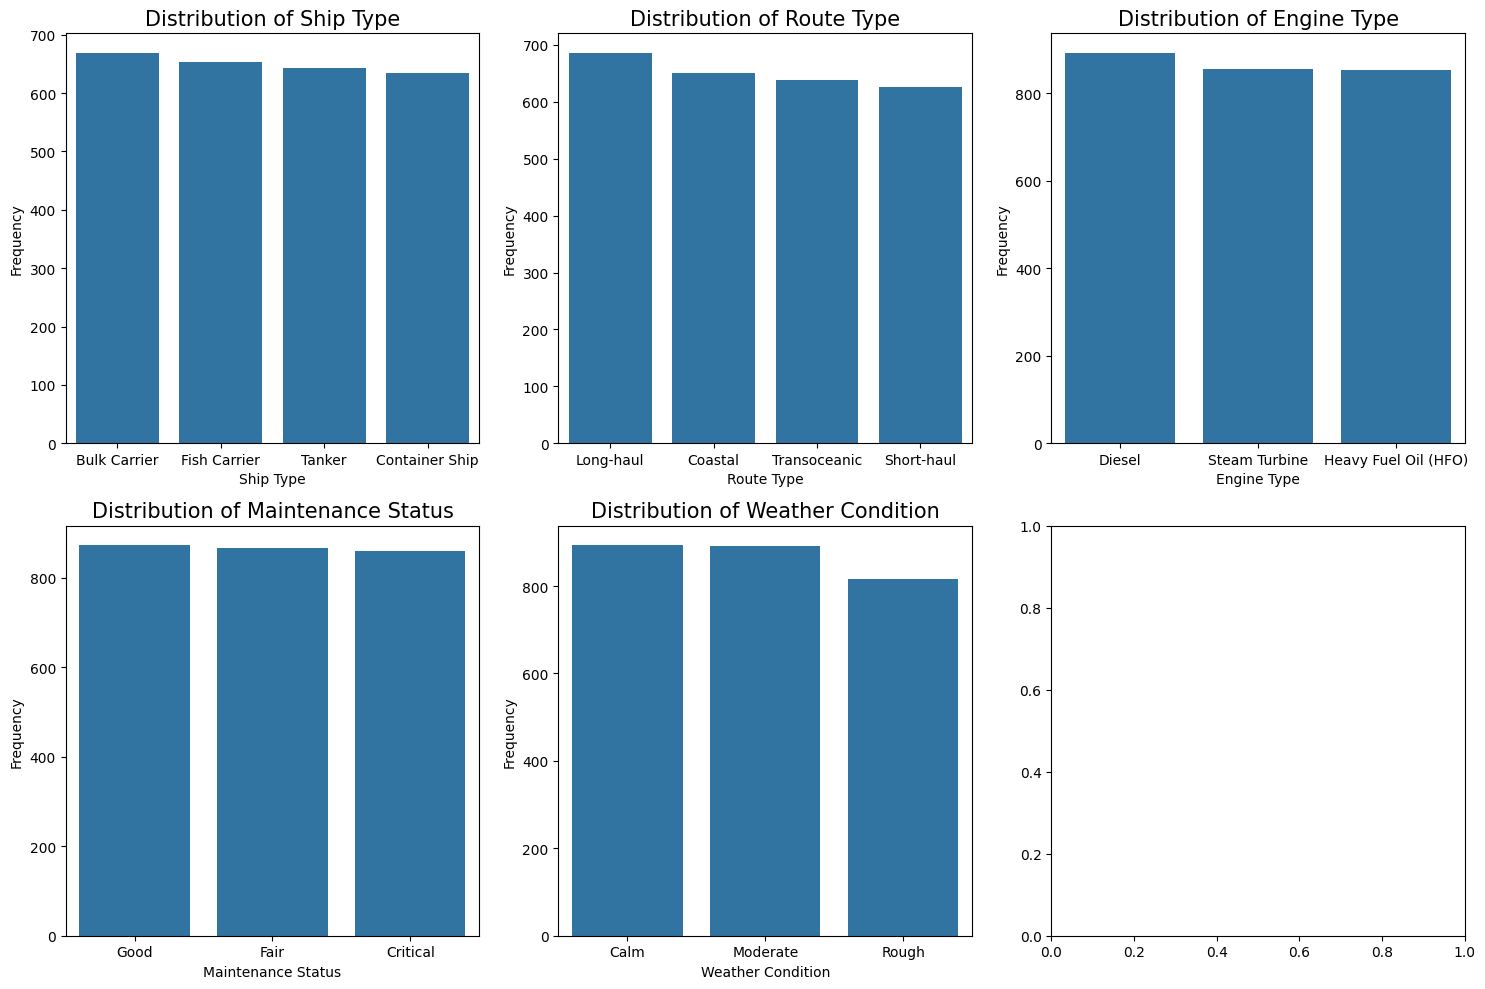

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# Create a figure and a grid of subplots
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Flatten the array of axes for easy iteration
axes = axes.flatten()

# Loop through the object columns in the DataFrame
for i, col in enumerate(df.select_dtypes(include='object').columns.tolist()[1:]):
    sns.barplot(x=df[col].value_counts().index, y=df[col].value_counts().values, ax=axes[i])
    axes[i].set_title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    axes[i].set_xlabel(f'{col.replace("_", " ").title()}')
    axes[i].set_ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


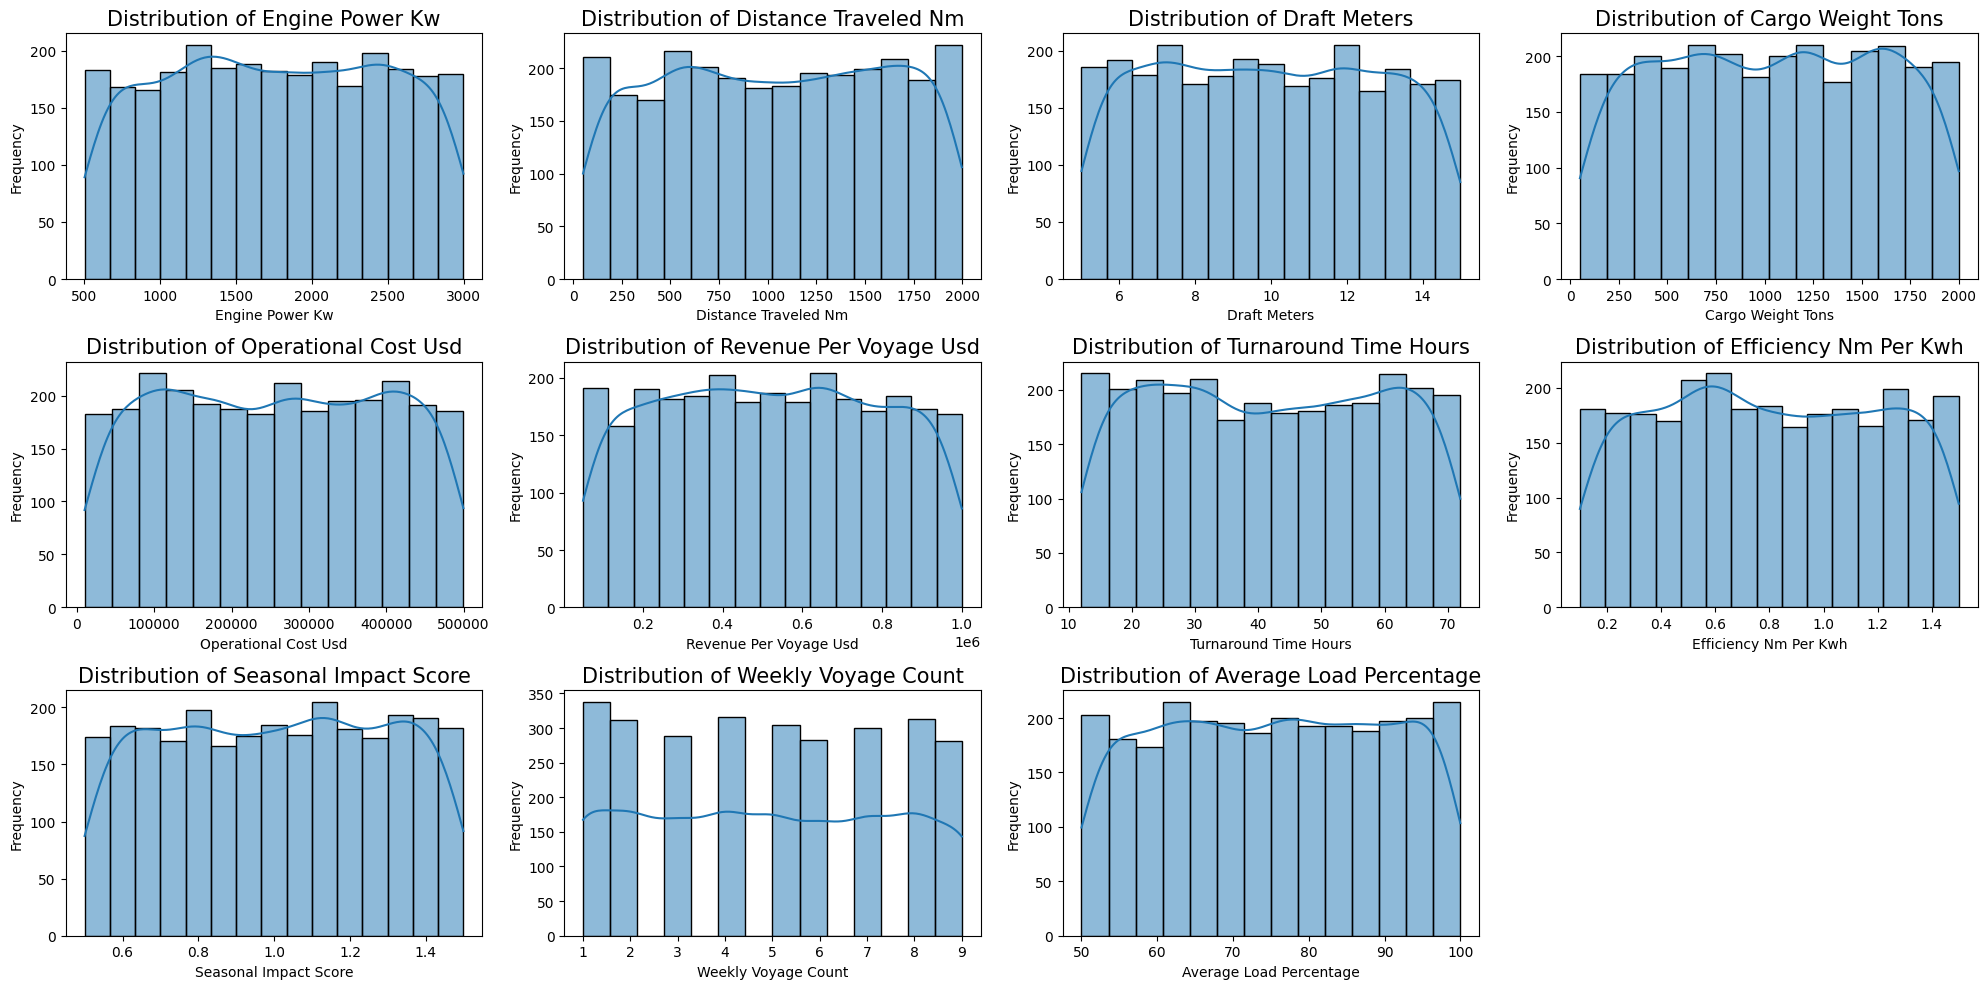

In [10]:
# Create a figure and a grid of subplots
plt.figure(figsize=(20, 10))

# Loop through the object columns in the DataFrame
for i, col in enumerate(df.select_dtypes(exclude='object').columns.tolist()[1:]):
    plt.subplot(3, 4, i+1)
    sns.histplot(data=df[col], kde=True)
    plt.title(f'Distribution of {col.replace("_", " ").title()}', size=15)
    plt.xlabel(f'{col.replace("_", " ").title()}')
    plt.ylabel('Frequency')

# Adjust layout
plt.tight_layout()
plt.show()


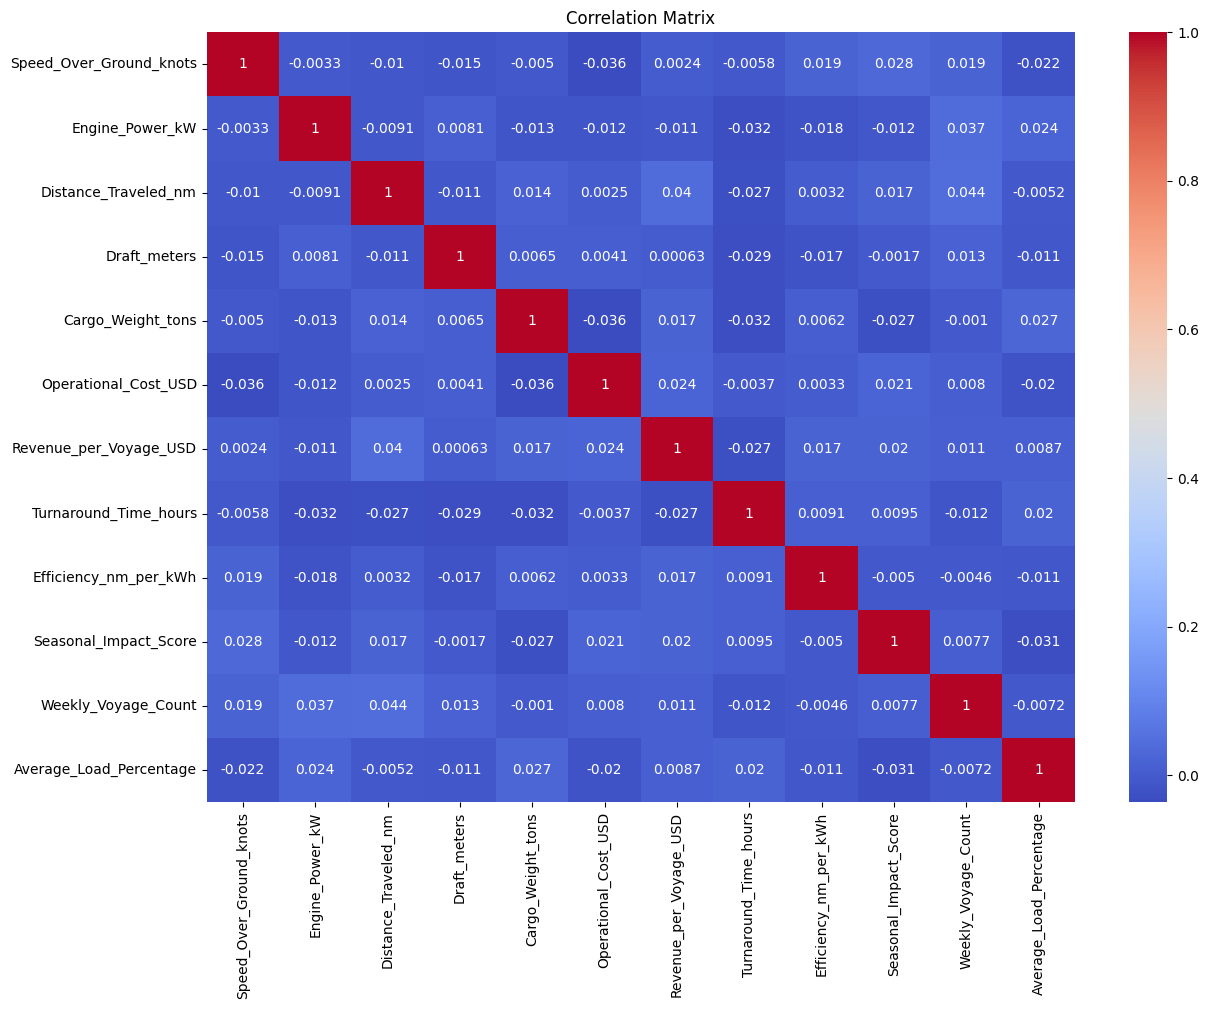

In [11]:
df.select_dtypes(exclude='object').corr()
plt.figure(figsize=(14,10))

sns.heatmap(df.select_dtypes(exclude='object').corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [12]:
from sklearn.preprocessing import LabelEncoder, OrdinalEncoder
data = df.copy()
# Fill NaN values with a constant value
# LabelEncoder for non-ordinal data
le_ship = LabelEncoder()
le_engine = LabelEncoder()
data.drop(columns=['Date'], inplace=True)
data['Ship_Type'] = le_ship.fit_transform(data['Ship_Type'])
data['Engine_Type'] = le_engine.fit_transform(data['Engine_Type'])
# OrdinalEncoder for ordinal data with handle_unknown parameter
oe = OrdinalEncoder(
    categories=[
        ['Coastal', 'Short-haul', 'Long-haul', 'Transoceanic'],  # Route_Type
        ['Critical', 'Fair', 'Good'],                            # Maintenance_Status
        ['Rough','Moderate', 'Calm',]                            # Weather_Condition
    ],
    handle_unknown='use_encoded_value',
    unknown_value= -1  # Assign -1 to unknown categories
)

data[['Route_Type', 'Maintenance_Status', 'Weather_Condition']] = oe.fit_transform(data[['Route_Type', 'Maintenance_Status', 'Weather_Condition']])

data

,Ship_Type,Route_Type,Engine_Type,Maintenance_Status,Speed_Over_Ground_knots,Engine_Power_kW,Distance_Traveled_nm,Draft_meters,Weather_Condition,Cargo_Weight_tons,Operational_Cost_USD,Revenue_per_Voyage_USD,Turnaround_Time_hours,Efficiency_nm_per_kWh,Seasonal_Impact_Score,Weekly_Voyage_Count,Average_Load_Percentage
0,1,-1.0,1,0.0,12.597558,2062.983982,1030.943616,14.132284,1.0,1959.017882,483832.354540,292183.273104,25.867077,1.455179,1.415653,1,93.769249
1,2,1.0,2,2.0,10.387580,1796.057415,1060.486382,14.653083,0.0,162.394712,483388.000509,883765.787360,63.248196,0.290361,0.885648,6,93.895372
2,1,2.0,0,1.0,20.749747,1648.556685,658.874144,7.199261,1.0,178.040917,448543.404044,394018.746904,49.418150,0.499595,1.405813,9,96.218244
3,0,3.0,2,1.0,21.055102,915.261795,1126.822519,11.789063,1.0,1737.385346,261349.605449,87551.375175,22.409110,0.702906,1.370704,1,66.193698
4,2,3.0,0,1.0,13.742777,1089.721803,1445.281159,9.727833,1.0,260.595103,287718.375160,676121.459632,64.158231,1.331343,0.583383,8,80.008581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2731,3,1.0,1,2.0,11.607997,2918.395972,239.990359,13.700906,1.0,318.111891,237975.067292,731584.322921,47.152337,1.000265,1.284895,3,74.813114
2732,0,1.0,1,2.0,13.852798,2161.282358,831.355653,14.612775,-1.0,218.309002,21029.021721,374365.370930,64.325916,0.653474,0.891085,2,84.595155
2733,1,1.0,2,0.0,16.813713,1343.608006,1376.460622,9.306518,-1.0,1630.646419,78883.312529,234120.365052,53.551090,0.594169,0.725404,6,80.975269
2734,3,3.0,1,2.0,23.132643,2028.143572,619.236340,6.623856,1.0,153.441965,25241.550250,799713.737211,14.335517,0.895670,0.902960,2,92.853622


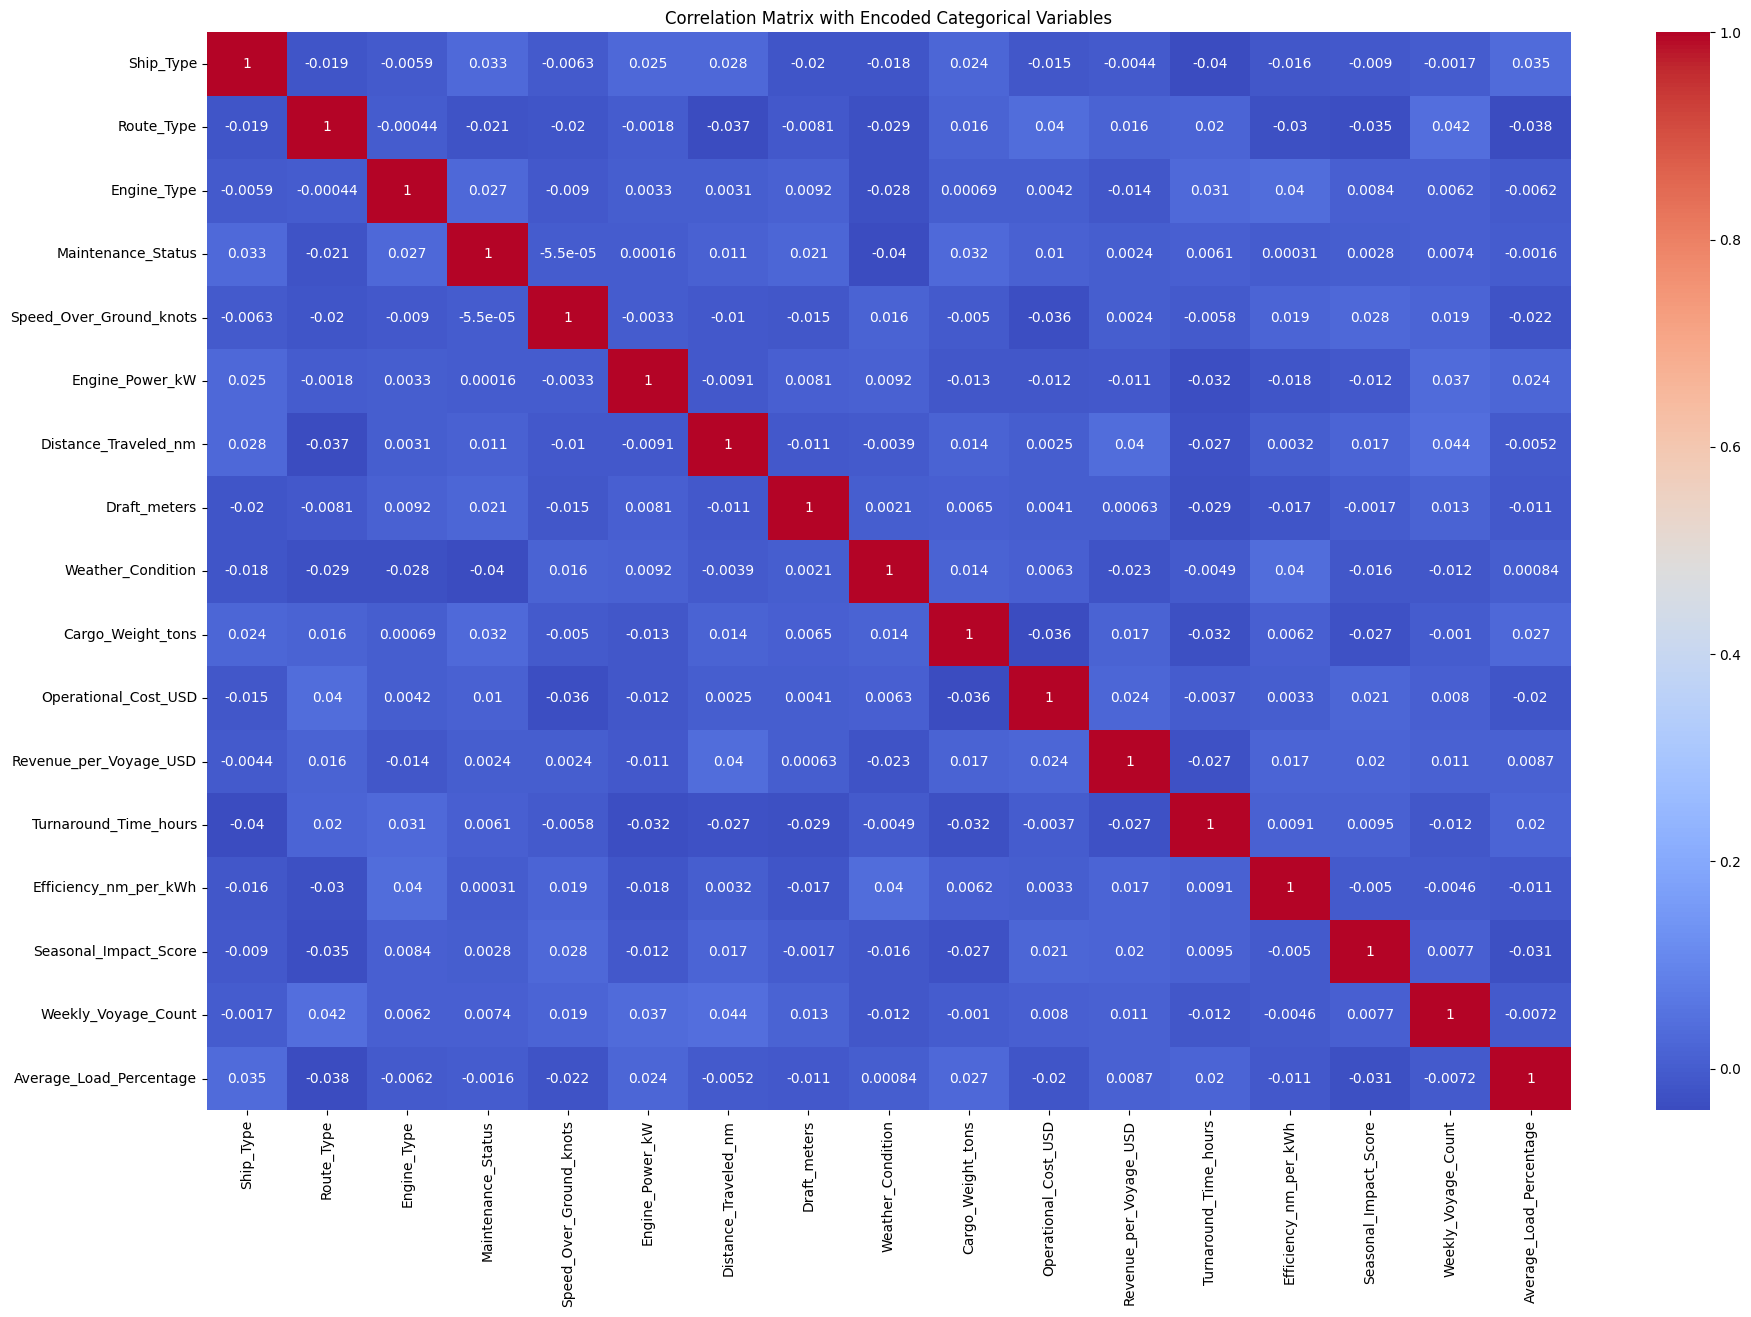

In [13]:
plt.figure(figsize=(22,14))

sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Encoded Categorical Variables")
plt.show()


In [14]:
from sklearn.preprocessing import StandardScaler

# Standardize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Text(0.5, 1.0, 'Correlation Matrix with Encoded Categorical Variables')

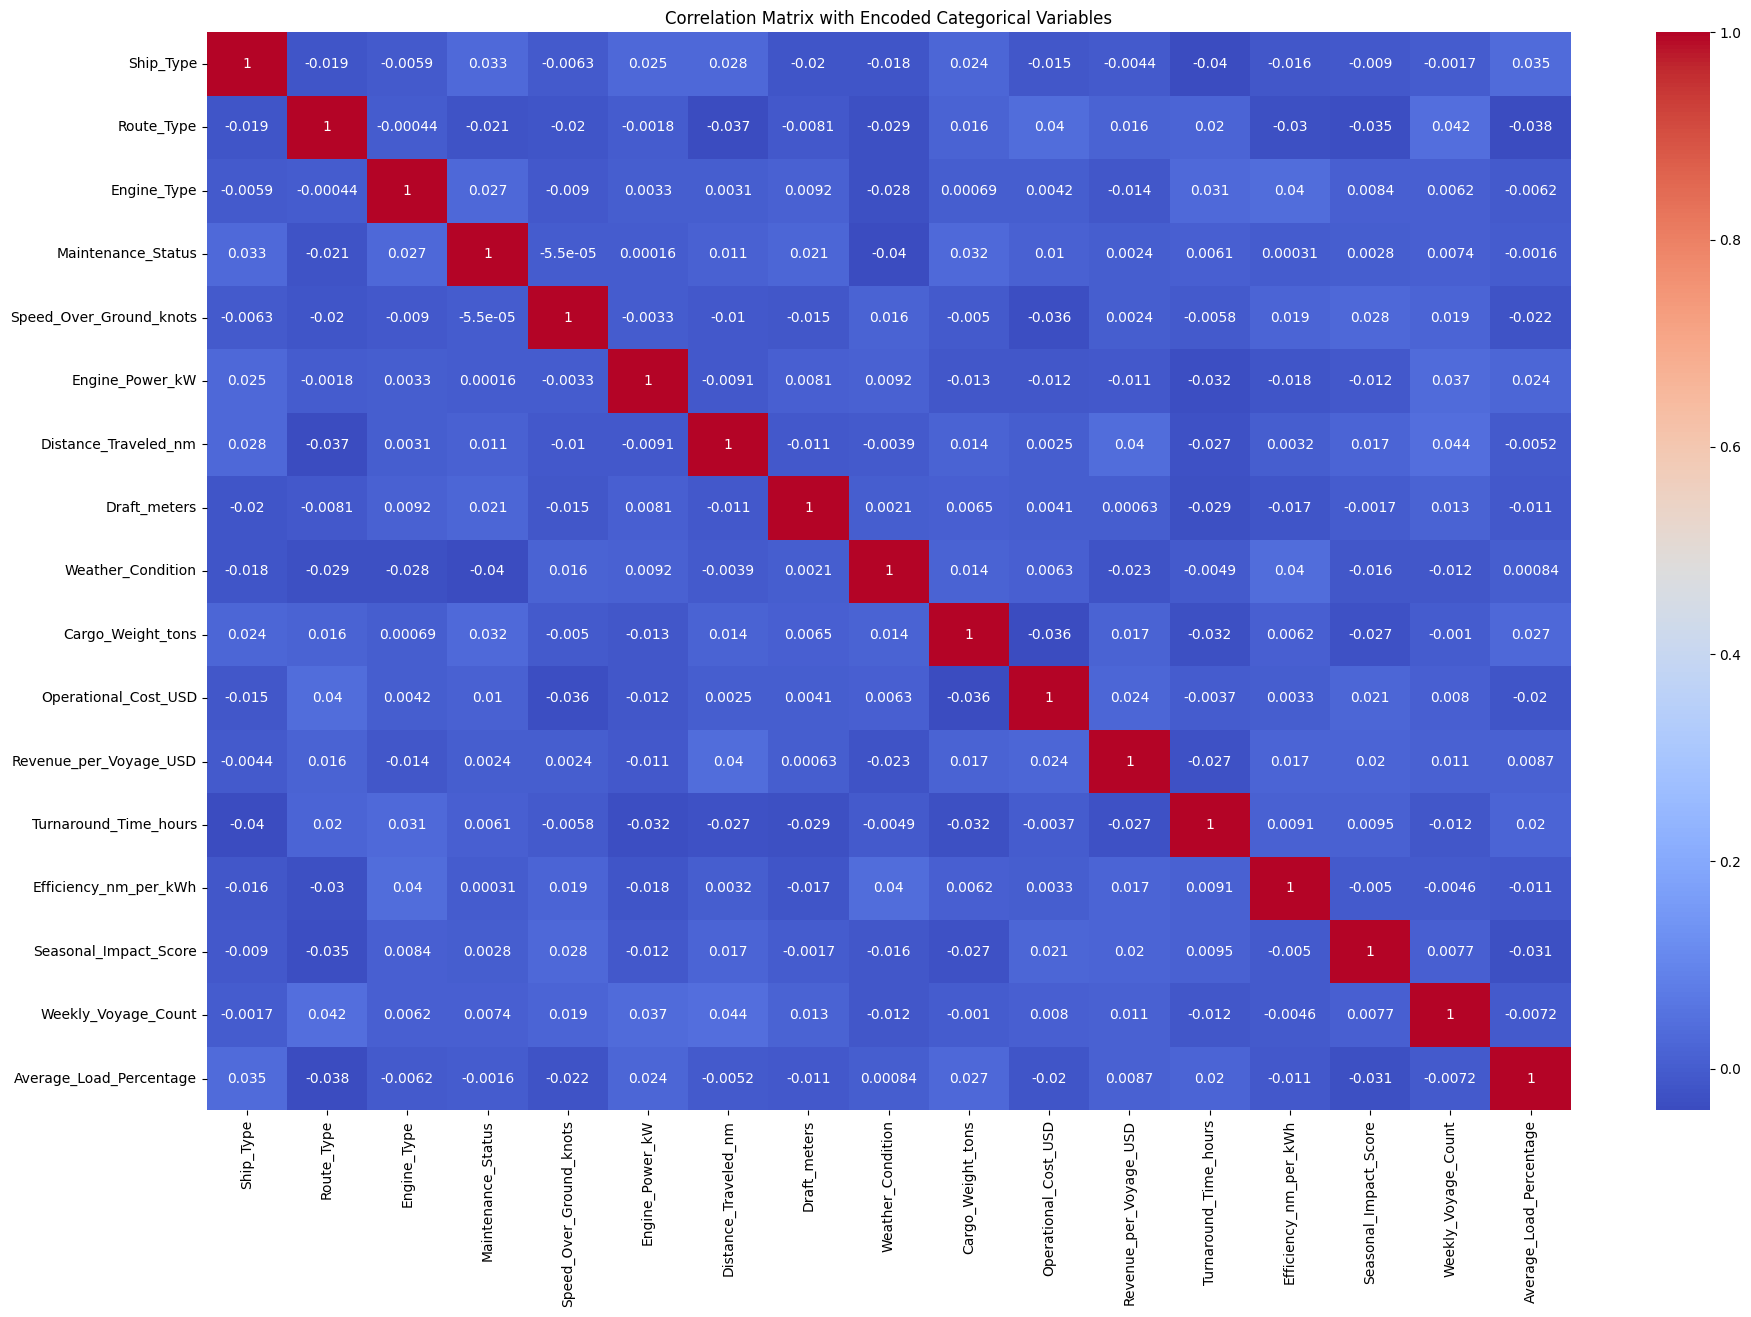

In [15]:
scaled_df = pd.DataFrame(scaled_data, columns=data.columns)
plt.figure(figsize=(22,14))

sns.heatmap(scaled_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix with Encoded Categorical Variables")

In [16]:
# Merge revenue and cost columns

data["Total_Profit"] = data["Revenue_per_Voyage_USD"] - data["Operational_Cost_USD"]
data.drop(columns=['Revenue_per_Voyage_USD', 'Operational_Cost_USD'], inplace=True) 

In [17]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Step 1: Preprocess the data
numeric_data = data.select_dtypes(exclude='object')  # Select numeric columns
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Step 2: Apply PCA
pca = PCA(n_components=0.9)  # Retain 95% of the variance
principal_components = pca.fit_transform(scaled_data)

# Step 3: Explained variance ratio
print("Explained variance ratio:", pca.explained_variance_ratio_)
print("Number of components:", pca.n_components_)

# Step 4: Create a DataFrame with principal components
pca_df = pd.DataFrame(principal_components, columns=[f'PC{i+1}' for i in range(pca.n_components_)])

Explained variance ratio: [0.07121276 0.06872017 0.06805867 0.06721637 0.06538488 0.06498555
 0.06436481 0.06271361 0.0623088  0.0610909  0.05949697 0.05865624
 0.05792726 0.05746188 0.05565738]
Number of components: 15


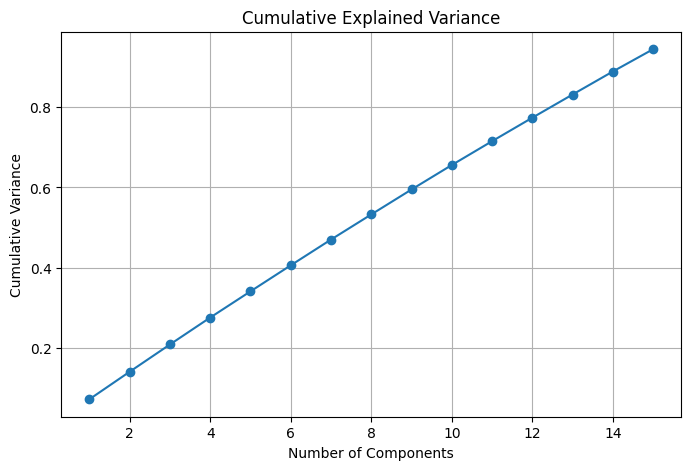

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.title('Cumulative Explained Variance')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance')
plt.grid()
plt.show()

In [19]:
data.columns.tolist()

['Ship_Type',
 'Route_Type',
 'Engine_Type',
 'Maintenance_Status',
 'Speed_Over_Ground_knots',
 'Engine_Power_kW',
 'Distance_Traveled_nm',
 'Draft_meters',
 'Weather_Condition',
 'Cargo_Weight_tons',
 'Turnaround_Time_hours',
 'Efficiency_nm_per_kWh',
 'Seasonal_Impact_Score',
 'Weekly_Voyage_Count',
 'Average_Load_Percentage',
 'Total_Profit']

In [20]:
correlation = df['Speed_Over_Ground_knots'].corr(df['Engine_Power_kW'])
print(f"Correlation between Speed_Over_Ground_knots and Engine_Power_kW: {correlation}")

Correlation between Speed_Over_Ground_knots and Engine_Power_kW: -0.003299412716146519


In [21]:
data.Ship_Type.dtype

dtype('int64')

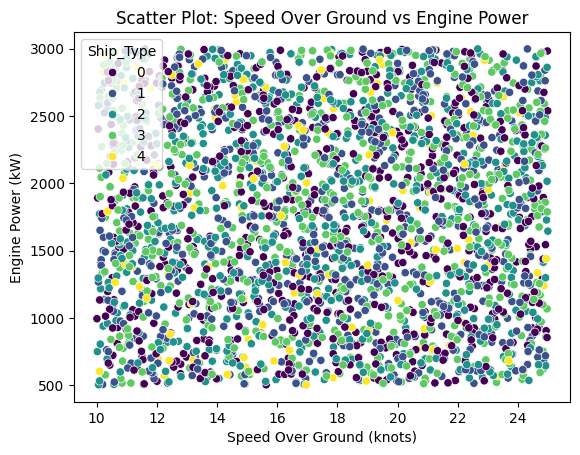

In [22]:
sns.scatterplot(x = data['Speed_Over_Ground_knots'], y= data['Engine_Power_kW'], hue=data['Ship_Type'],  palette='viridis' )
plt.title('Scatter Plot: Speed Over Ground vs Engine Power')
plt.xlabel('Speed Over Ground (knots)')
plt.ylabel('Engine Power (kW)')
plt.show()

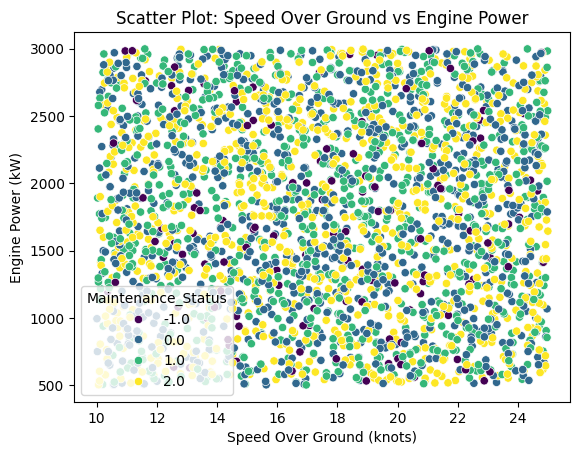

In [23]:
sns.scatterplot(x = data['Speed_Over_Ground_knots'], y= data['Engine_Power_kW'], hue=data['Maintenance_Status'],  palette='viridis' )
plt.title('Scatter Plot: Speed Over Ground vs Engine Power')
plt.xlabel('Speed Over Ground (knots)')
plt.ylabel('Engine Power (kW)')
plt.show()

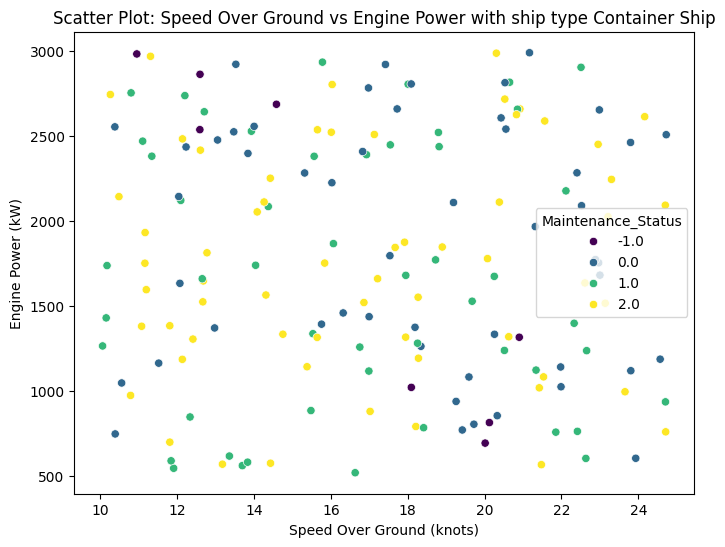

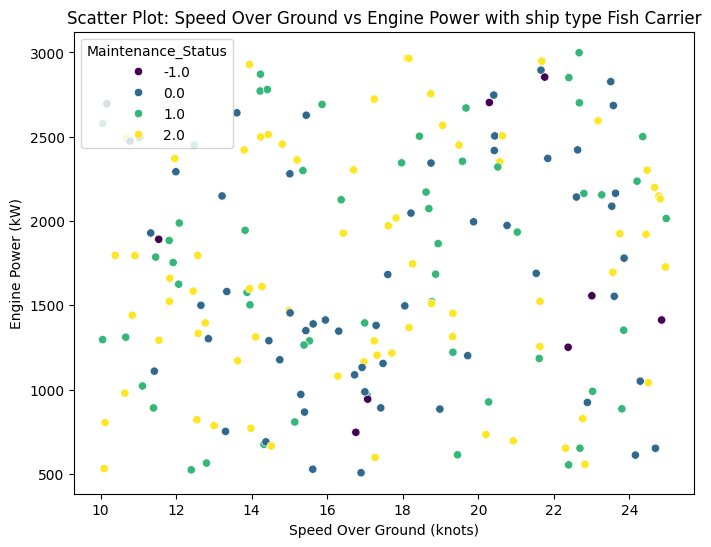

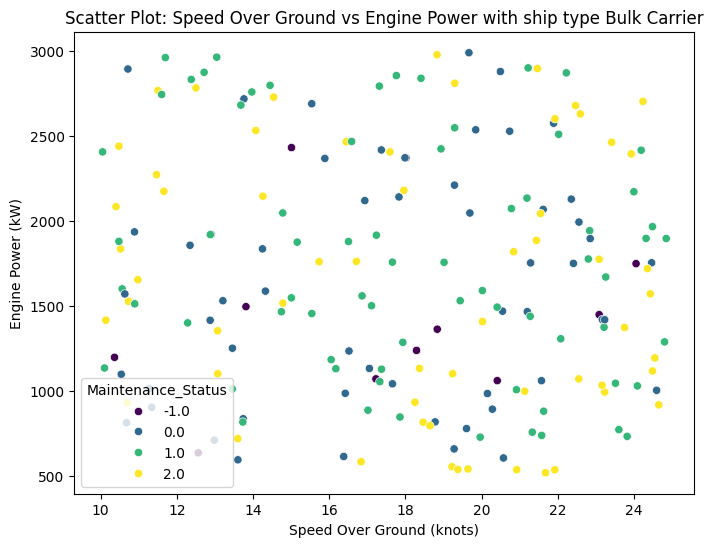

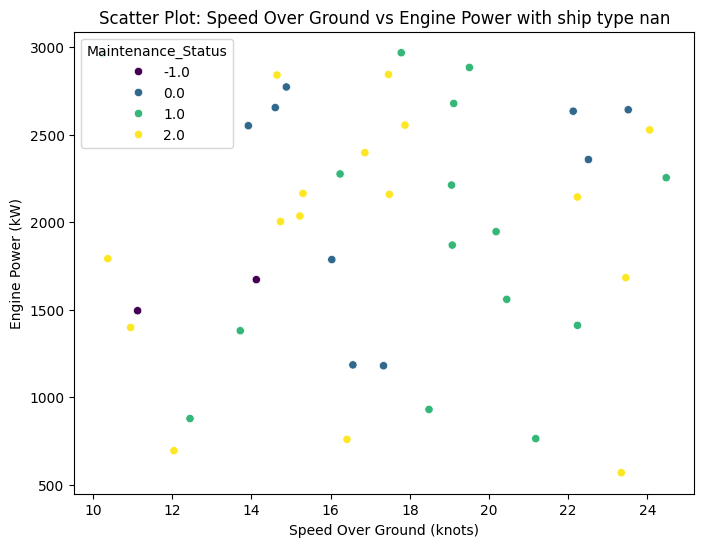

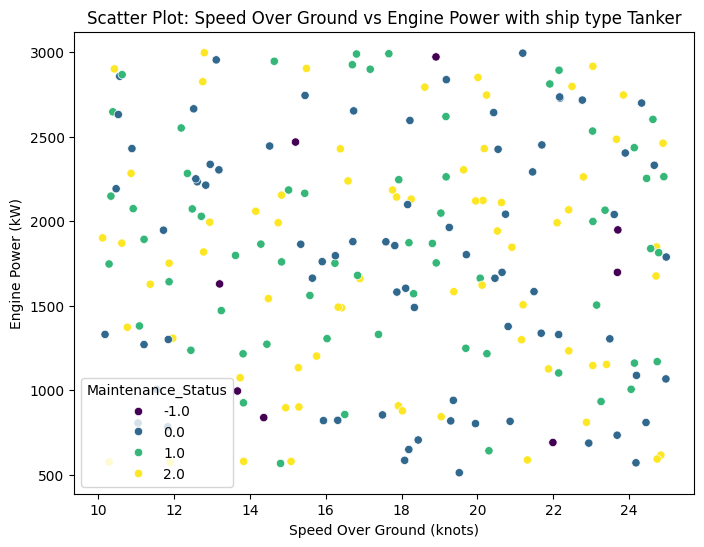

In [24]:
for ship_type in data.Ship_Type.unique():
    subset = data[(data['Ship_Type'] == ship_type) & (data['Weather_Condition'] == 0)]
    plt.figure(figsize=(8, 6))
    sns.scatterplot(x = subset['Speed_Over_Ground_knots'], y= subset['Engine_Power_kW'], hue=subset['Maintenance_Status'],  palette='viridis' )
    plt.title(f'Scatter Plot: Speed Over Ground vs Engine Power with ship type {le_ship.inverse_transform([ship_type])[0]}')
    plt.xlabel('Speed Over Ground (knots)')
    plt.ylabel('Engine Power (kW)')
    plt.show()

In [26]:
pca = PCA(n_components=2, random_state=42)
pca_components = pca.fit_transform(data)

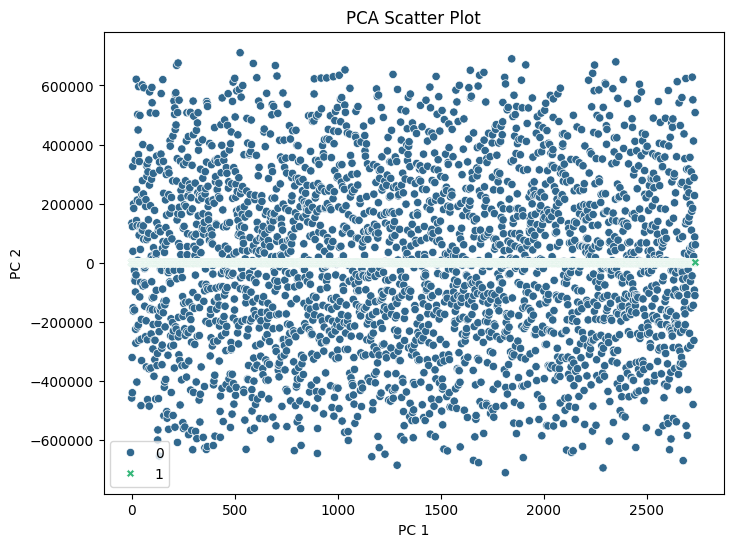

In [32]:
plt.figure(figsize=(8, 6))
sns.scatterplot(pca_components,  palette='viridis' )
plt.title(f'PCA Scatter Plot')
plt.xlabel('PC 1')
plt.ylabel('PC 2')
plt.show()

In [47]:
data_stripped = data.copy()
data_stripped.drop(columns=['Ship_Type', 'Engine_Type', 'Route_Type', 'Maintenance_Status', 'Weather_Condition'], inplace=True)

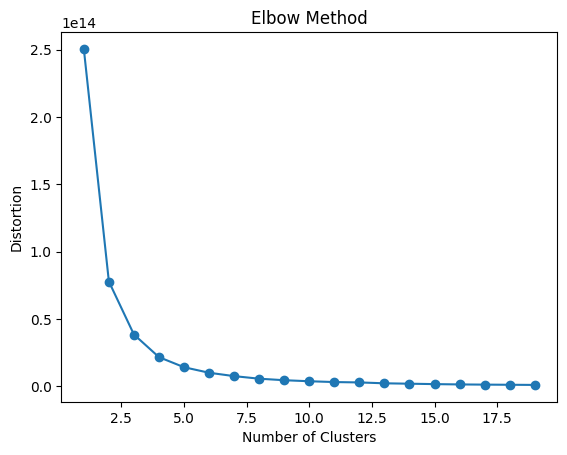

In [41]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

distortions = []
for k in range(1, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_stripped)
    distortions.append(kmeans.inertia_)

plt.plot(range(1, 20), distortions, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Distortion')
plt.show()

In [43]:
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(data_stripped) 
data['cluster'] = kmeans.labels_

In [51]:
data.columns.tolist()

['Ship_Type',
 'Route_Type',
 'Engine_Type',
 'Maintenance_Status',
 'Speed_Over_Ground_knots',
 'Engine_Power_kW',
 'Distance_Traveled_nm',
 'Draft_meters',
 'Weather_Condition',
 'Cargo_Weight_tons',
 'Turnaround_Time_hours',
 'Efficiency_nm_per_kWh',
 'Seasonal_Impact_Score',
 'Weekly_Voyage_Count',
 'Average_Load_Percentage',
 'Total_Profit',
 'cluster']

In [53]:
data[['Route_Type', "Maintenance_Status", "Weather_Condition"]] = oe.inverse_transform(data[['Route_Type', "Maintenance_Status", "Weather_Condition"]].values)

In [56]:
data["Ship_Type"] = le_ship.inverse_transform(data["Ship_Type"].values)
data["Engine_Type"] = le_engine.inverse_transform(data["Engine_Type"].values) 

In [61]:
data.groupby("cluster").describe()

Speed_Over_Ground_knots                                             \
                          count       mean       std        min        25%   
cluster                                                                      
0                         613.0  17.587860  4.282300  10.054319  14.068549   
1                         659.0  17.737474  4.354880  10.009756  13.954089   
2                         667.0  17.415495  4.250460  10.034273  13.785738   
3                         381.0  17.867444  4.305508  10.024793  14.443638   
4                         416.0  17.469829  4.391791  10.136148  13.588436   

                                         Engine_Power_kW               ...  \
               50%        75%        max           count         mean  ...   
cluster                                                                ...   
0        17.525728  21.376483  24.980463           613.0  1761.249539  ...   
1        17.965550  21.593889  24.991661           659.0  1768.781079  ...   
2        17.322242  20.880879  24.977582           667.0  1721.538589  ...   
3        18.342452  21.531517  24.997043           381.0  1770.453097  ...   
4        17.366205  21.174313  24.951504           416.0  1780.629716  ...   

        Average_Load_Percentage            Total_Profit                 \
                            75%        max        count           mean   
cluster                                                                  
0                     87.973329  99.832868        613.0  493731.988561   
1                     86.219597  99.999643        659.0   58265.036428   
2                     88.574835  99.990785        667.0  277077.716558   
3                     88.059338  99.864101        381.0  744885.384140   
4                     87.517302  99.952220        416.0 -195413.762380   

                                                                    \
                  std            min            25%            50%   
cluster                                                              
0        66973.996655  384745.850065  436456.088662  491516.313526   
1        65975.798377  -67571.855306    6779.669691   62237.684060   
2        62551.739076  167350.972256  224825.480254  274554.352708   
3        86085.490609  618638.704450  670633.318686  731509.651974   
4        87695.839825 -444584.049151 -259834.679034 -180272.571083   

                                       
                   75%            max  
cluster                                
0        547989.672865  618490.755758  
1        114725.448315  167163.789962  
2        332781.100711  384411.832662  
3        810521.202804  977168.394742  
4       -126063.467679  -69273.063177  

[5 rows x 88 columns]

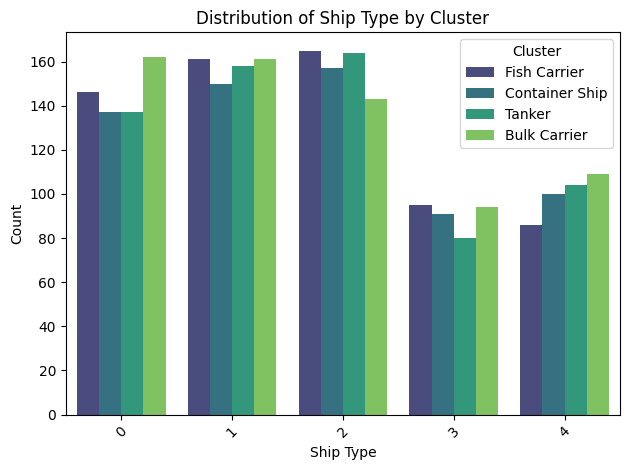

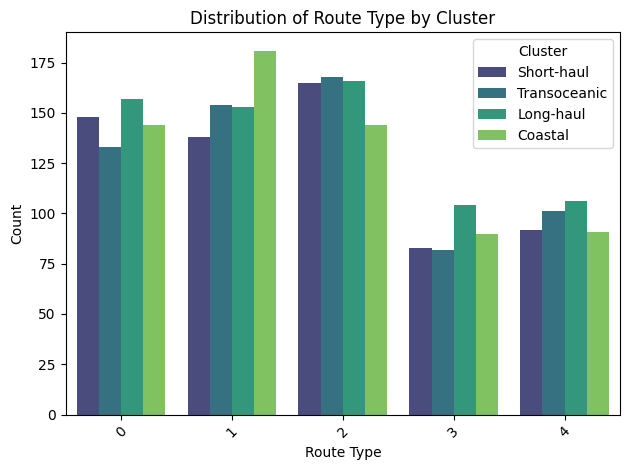

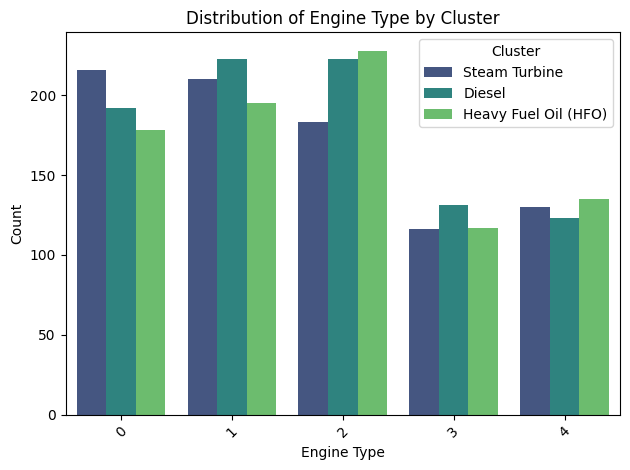

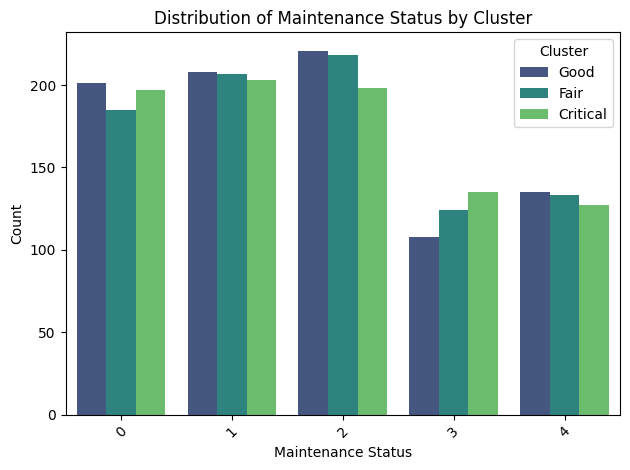

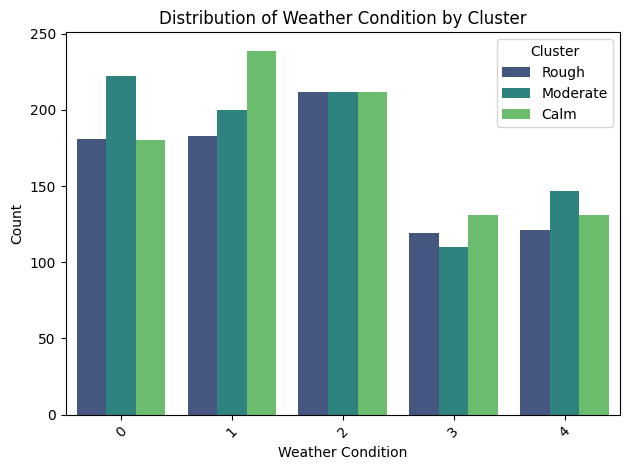

In [65]:
for dtype in data.select_dtypes(include='object').columns.tolist():
    sns.countplot(data=data, x="cluster", hue=dtype, palette='viridis')
    plt.title(f"Distribution of {dtype.replace('_', ' ').title()} by Cluster")
    plt.xlabel(dtype.replace('_', ' ').title())
    plt.ylabel("Count")
    plt.legend(title="Cluster")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


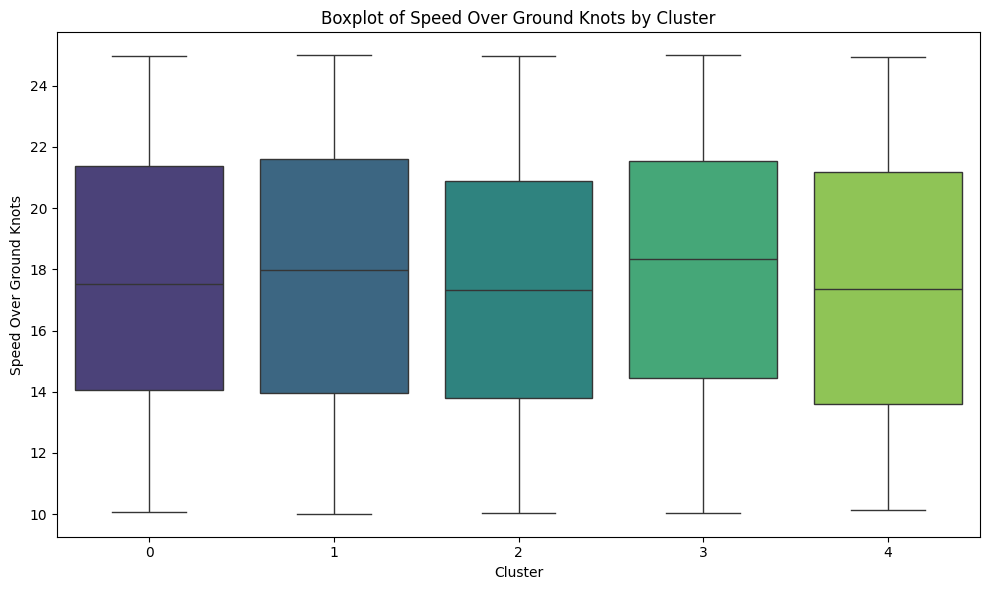

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


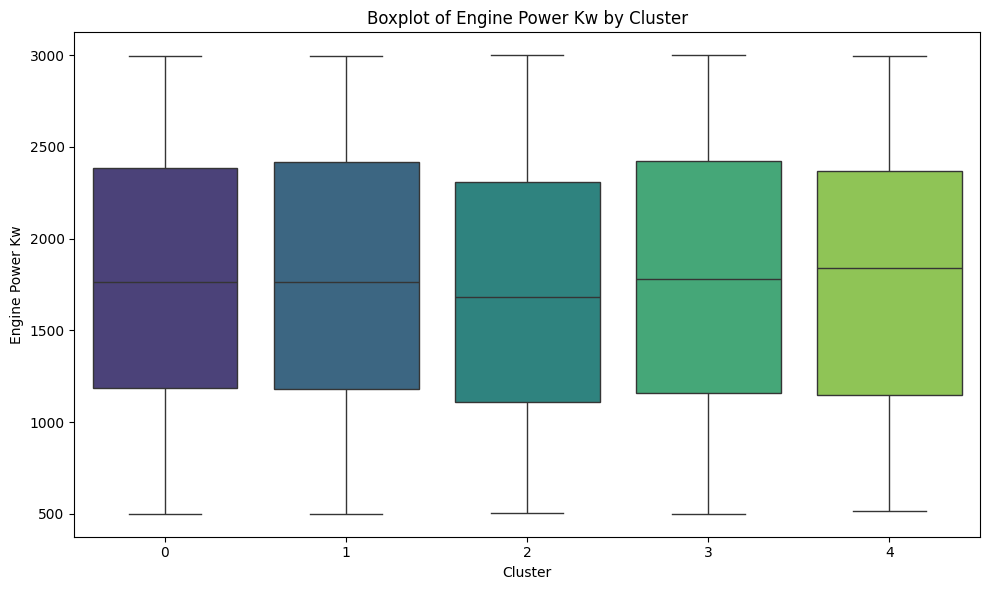

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


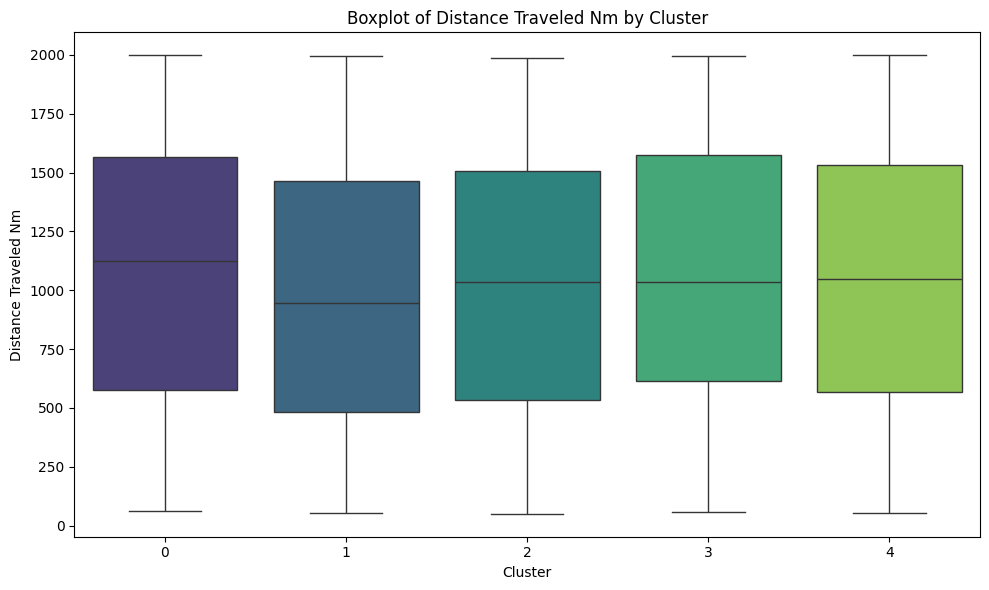

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


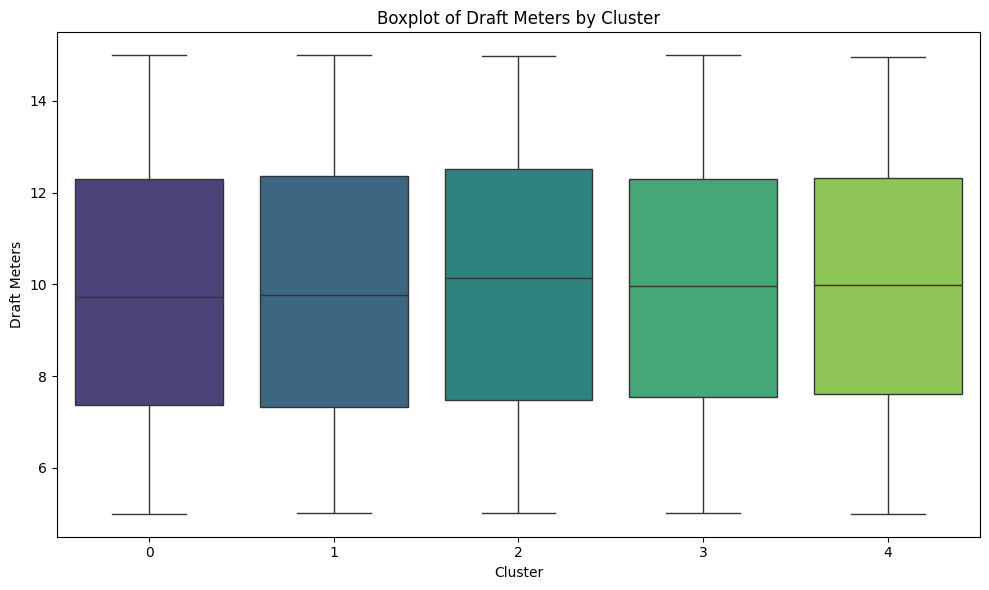

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


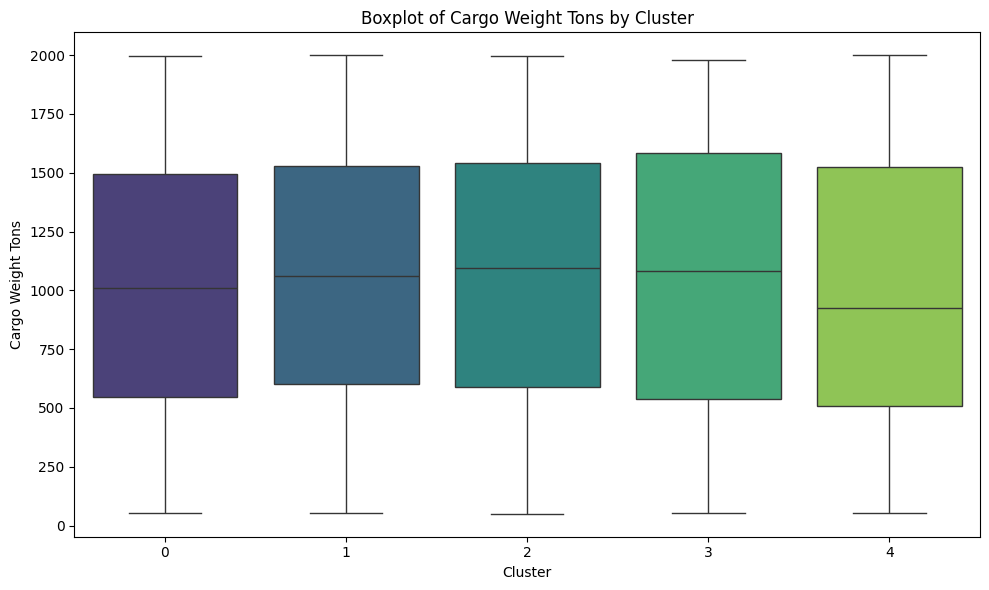

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


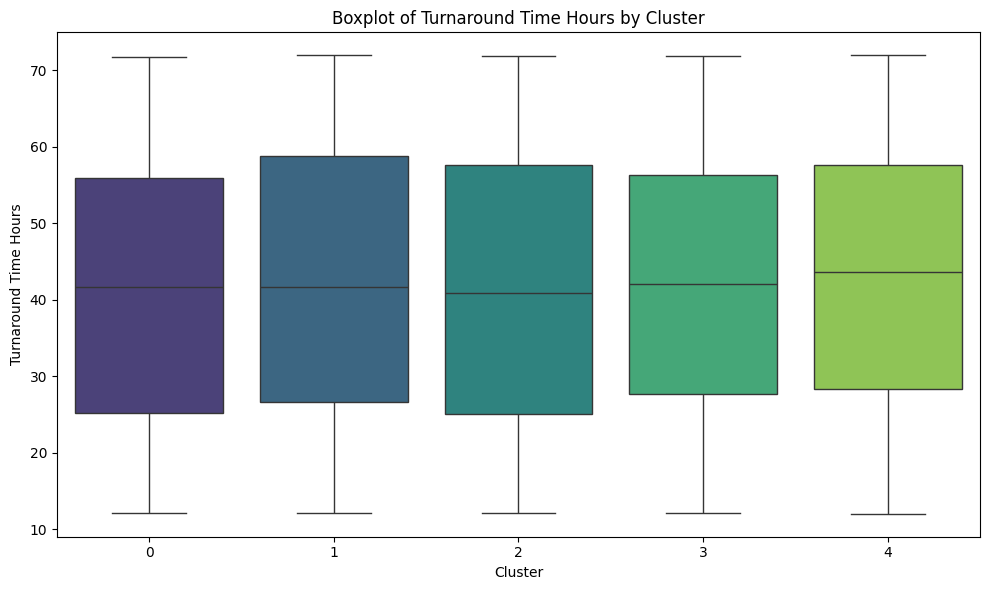

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


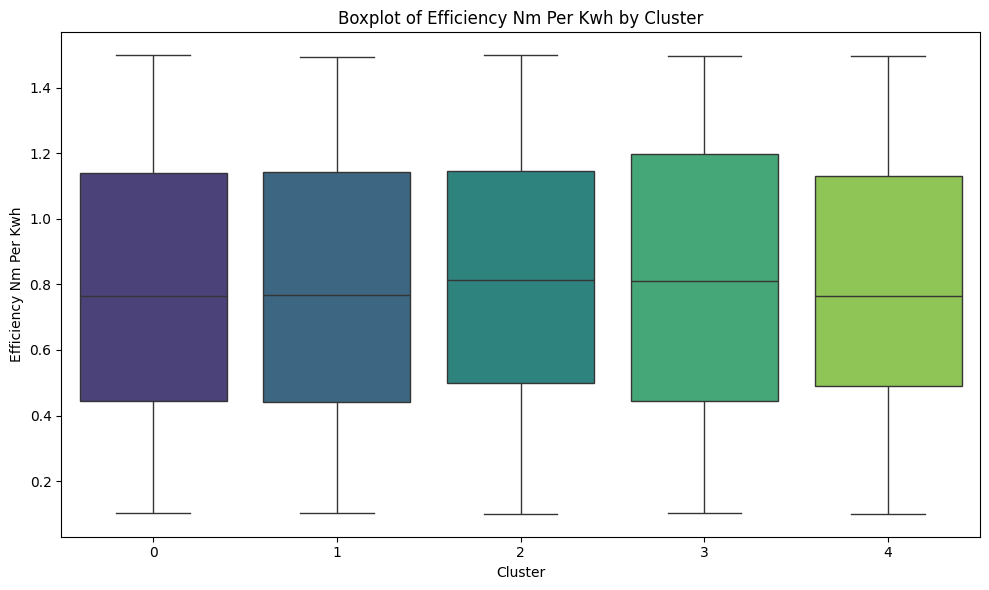

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


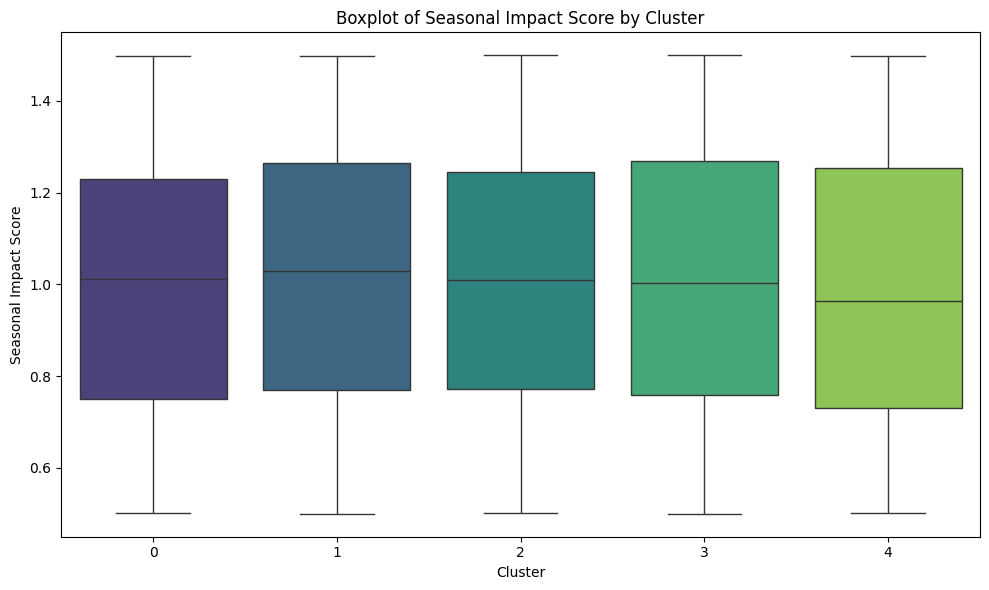

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


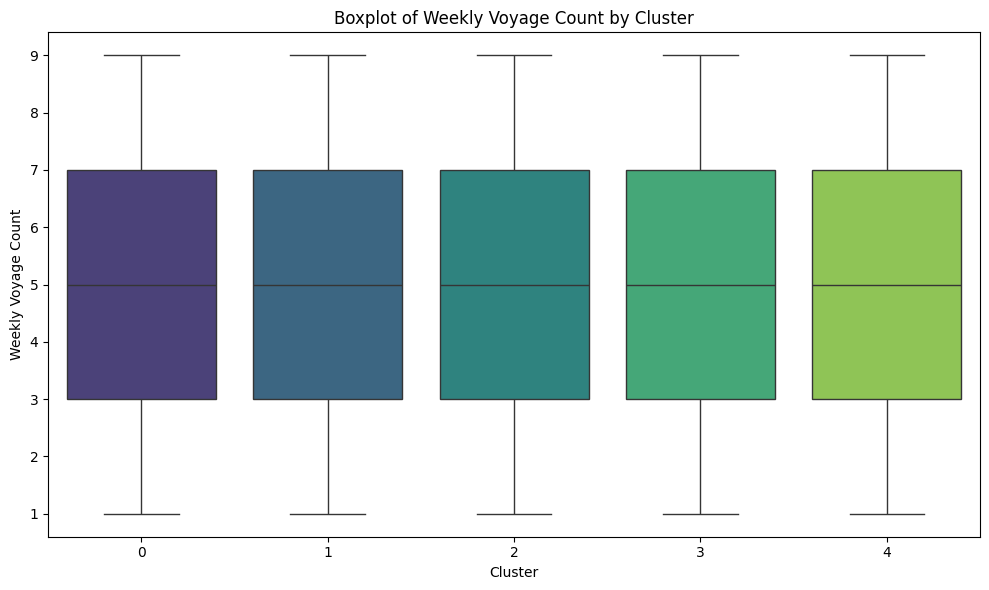

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


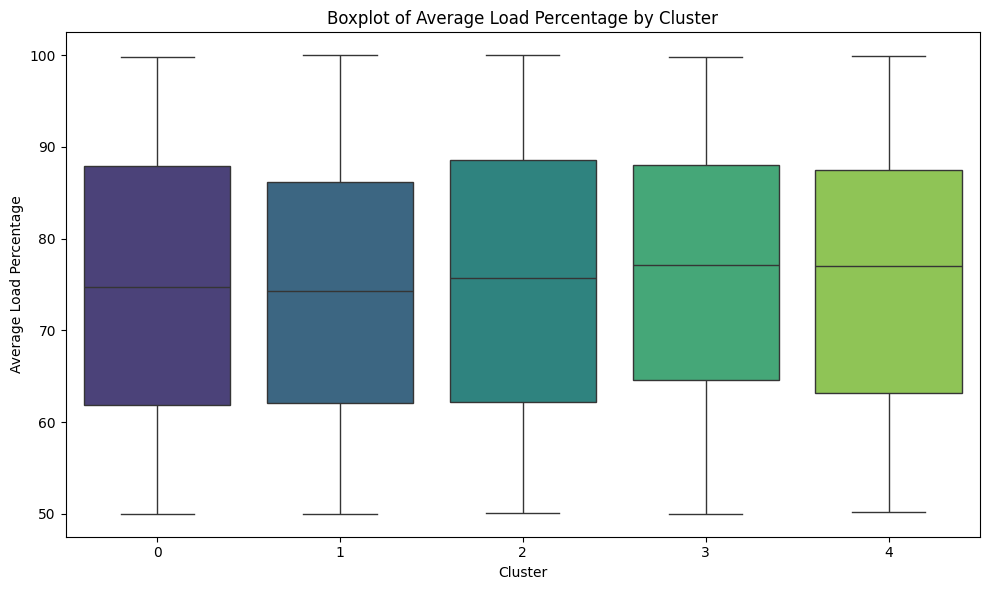

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


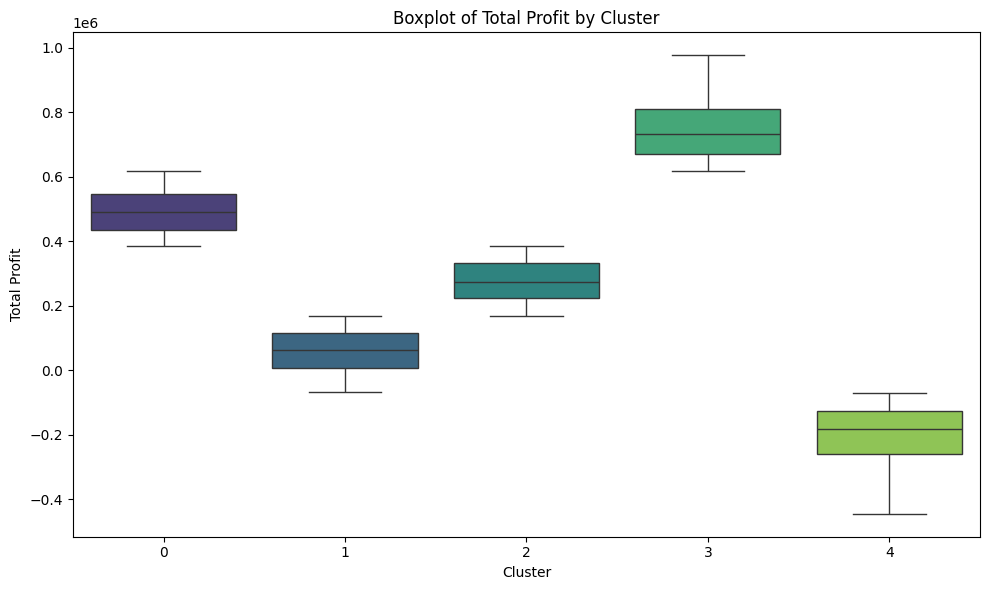

/tmp/ipykernel_2037/3231488572.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=data, x='cluster', y=col, palette='viridis')


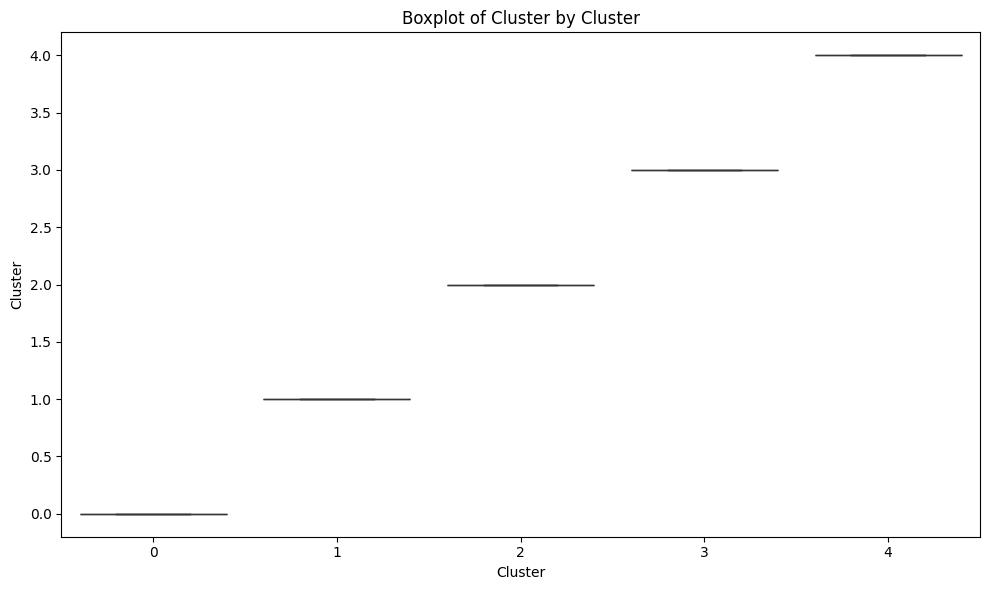

In [66]:
numerical_columns = data.select_dtypes(exclude='object').columns.tolist()

# Iterate over each numerical column
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=data, x='cluster', y=col, palette='viridis')
    plt.title(f"Boxplot of {col.replace('_', ' ').title()} by Cluster")
    plt.xlabel("Cluster")
    plt.ylabel(col.replace('_', ' ').title())
    plt.tight_layout()
    plt.show()